In [1]:
import numpy as np
from matplotlib import pyplot
from PIL import Image
import math


In [2]:
img = np.array(Image.open('imgs-P1/cabeza.pgm').convert('L'))

In [5]:
def multiHist(im:np.ndarray,n:int)->list[np.ndarray]:
    if n <= 1:
        hist, _ =np.histogram(im.flatten(),3)
        return [hist]
    else:
        pf = math.ceil(im.shape[0]/2)
        pc = math.ceil(im.shape[1]/2)
        sol = [np.histogram(im.flatten(),3)[0]]
        for y in range(0,im.shape[0],pf):
            for x in range(0,im.shape[1],pc):
                sol.extend(multiHist(im[y:y+pf,x:x + pc],n-1))
        return sol

    

In [6]:
multiHist(img,2)

[array([11961,  2557,   722], dtype=int64),
 array([3124,  613,  103], dtype=int64),
 array([2217, 1427,  196], dtype=int64),
 array([3603,  111,   66], dtype=int64),
 array([2864,  550,  366], dtype=int64)]

In [70]:
img.shape[0]/4,img.shape[1] / 5 

(165.75, 82.4)

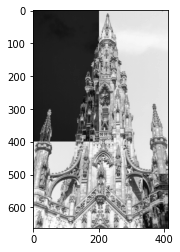

In [44]:
m = 4
n = 5
x = 4
y = 5
a= math.ceil(img.shape[0] /m)
b= math.ceil(img.shape[1] /n)
u = img.copy()
u[(x-1)*a:x*a,(y-1)*b:y*b] = (np.full(img[(x-1)*a:x*a,(y-1)*b:y*b].shape,255) - img[(x-1)*a:x*a,(y-1)*b:y*b])
pyplot.imshow(u,cmap='gray')

In [45]:
def cuadricula(mat:np.ndarray,m:int,n:int):
  img = mat.copy()
  n_filas = math.ceil(img.shape[0] /m)
  n_cols = math.ceil(img.shape[1] /n)
  for v in range(1,m+1):
    indice_fila_ini = n_filas * (v-1)
    indice_fila_fin = n_filas * v
    for h in range(v%2,n+1,2):
        indice_col_ini = n_cols * (h-1)
        indice_col_fin =  n_cols * h
        # print((v,h),(indice_fila_ini,indice_fila_fin),(indice_col_ini,indice_col_fin))
        img[indice_fila_ini:indice_fila_fin,indice_col_ini:indice_col_fin] = np.full(img[indice_fila_ini:indice_fila_fin,indice_col_ini:indice_col_fin].shape,255) - img[indice_fila_ini:indice_fila_fin,indice_col_ini:indice_col_fin]
  return img

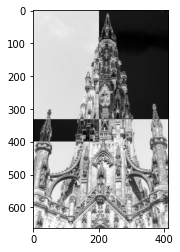

In [46]:
pyplot.imshow(cuadricula(img,2,1),cmap='gray')

In [158]:
m = 10
n= 5

In [159]:
x = int(np.ceil( img.shape[0] /m))
y = int(np.ceil( img.shape[1] /n))

In [160]:
x,x*m,img.shape[0]

(67, 670, 663)

In [162]:
for v in range(m):
    ifi = y * v
    iff = ifi + y
    for h in range(v%2,(n+1),2):
        cfi = x * h
        cff = cfi + x 
        # print((v,h),(ifi,iff),(cfi,cff))
        img[ifi:iff,cfi:cff] = np.full(img[ifi:iff,cfi:cff].shape,255) - img[ifi:iff,cfi:cff]

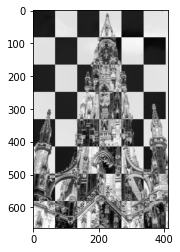

In [156]:
pyplot.imshow(img,cmap='gray')